<a href="https://colab.research.google.com/github/P-sys/test_task_sysoeva/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Вопросы:

1) 7/10
2) 7/10

Математика:

**1)** 40 - 20 * (1 + 0.8) = 4 ОТВЕТ: 4$

**2)** Одна кампания в час: 120/(24 \* 6 \* 5) = 1/6$

8 * 9 / 6 = 12$ - 9 кампаний в день

216 / 12 = 18 дней ОТВЕТ: 18 дней

**3)** x - общие баннеры

200 - 80 - 60 = 60 - баннеры только 2 и общие

3x + x = 60

x = 15 ОТВЕТ: 15 баннер и в 1 и во 2

**4)** Предпочтения сопадают у Джона и Кейт

**5)** x - искомый балл

(78 * 4 + x)/5 = 80

x = 88 ОТВЕТ: 88 баллов

**6)** (260/80 - 260/100) * 60 = 39 минут ОТВЕТ: на 39 минут

In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
import collections
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('/content/data.xlsx')

In [3]:
data.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00


1. Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных
средств которых не просрочен.

In [4]:
id_s_jul = data.index[data['status'] == 'Июль 2021'].tolist()[0]
id_e_jul = data.index[data['status'] == 'Август 2021'].tolist()[0]
print(id_s_jul, id_e_jul)

258 369


In [5]:
data_jul = data[id_s_jul + 1:id_e_jul]
if sum(data_jul['sum'].isna()) == 0:
  id_ps = data_jul.index[data_jul['status'] == 'ПРОСРОЧЕНО'].tolist()
  sum_jul = sum(data_jul['sum']) - sum(data_jul['sum']\
                             [data_jul['status'] == 'ПРОСРОЧЕНО'])
  print('Общая выручка за июль 2021 составила {}'.format(round(sum_jul, 2)))

Общая выручка за июль 2021 составила 859896.47


3. Кто из менеджеров привлек для компании больше всего денежных средств в
сентябре 2021?

In [6]:
id_s_spt = data.index[data['status'] == 'Сентябрь 2021'].tolist()[0]
id_e_spt = data.index[data['status'] == 'Октябрь 2021'].tolist()[0]
print(id_s_spt, id_e_spt)

484 594


In [7]:
data_spt = data[id_s_spt + 1:id_e_spt]
data_gr_sale = data_spt.groupby(data_spt.sale).sum().reset_index()

In [8]:
best_sale = list(data_gr_sale['sale'][data_gr_sale['sum'] == \
                                      max(data_gr_sale['sum'])])[0]

print('В сентябре 2021 {} привлек для компании больше всего денежных средств\
 в размере {}'.format(best_sale, max(data_gr_sale['sum'])))

В сентябре 2021 Смирнов привлек для компании больше всего денежных средств в размере 221525.7


4. Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [9]:
data_oct = data[id_e_spt + 1:]
dif = sum(data_oct['new/current'] == 'текущая') - \
sum(data_oct['new/current'] == 'новая')

if dif < 0:
  print('В октябре 2021 преобладали сделки типа "новая" на {}'.format(dif))

else:
  print('В октябре 2021 преобладали сделки типа "текущая" на {}'.format(dif))

В октябре 2021 преобладали сделки типа "текущая" на 63


5. Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [10]:
id_s_may = data.index[data['status'] == 'Май 2021'].tolist()[0]
id_e_may = data.index[data['status'] == 'Июнь 2021'].tolist()[0]
print(id_s_may, id_e_may)

0 129


In [11]:
data_may = data[id_s_may + 2:id_e_may]
dt_may = pd.DataFrame(pd.to_datetime(data_may['receiving_date'], \
                                     format="%d/%m/%Y, %H:%M:%S"))

In [12]:
dt_may_gr = dt_may.groupby(dt_may.receiving_date.dt.month).count()
print('В июне 2021 было получено {} оригиналов договора по майским сделкам'.format(dt_may_gr._get_value(6, 'receiving_date')))

В июне 2021 было получено 77 оригиналов договора по майским сделкам


2. Как изменялась выручка компании за рассматриваемый период?
Проиллюстрируйте графиком.

In [13]:
data_mon = [data_may, data[id_e_may + 1:id_s_jul], \
            data_jul, data[id_e_jul + 1:id_s_spt], data_spt, data_oct]

sum_all_mon = [sum(d_m['sum']) for d_m in data_mon]

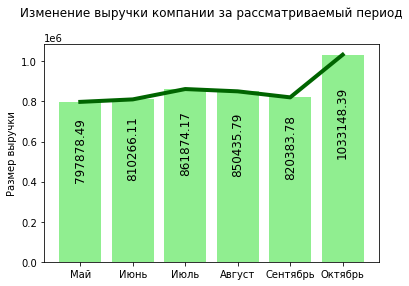

In [14]:
fig, ax = plt.subplots()

bar_x = list(['Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь'])
bar_label = [round(i, 2) for i in sum_all_mon]

bar_plot = plt.bar(bar_x, sum_all_mon, color='lightgreen')

def autolabel(rects):
    for idx, rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.5*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=90, size='large')

autolabel(bar_plot)
plt.plot(bar_label, color='darkgreen', linewidth=4)
plt.ylabel('Размер выручки')
plt.title('Изменение выручки компании за рассматриваемый период', pad=28)
plt.show()

За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом.

1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).

2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс., и 3 % от суммы, если меньше. При этом статус оплаты может быть любым, кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом месяце).

Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого месяца, считаются остатком на следующий период, который выплачивается по
мере прихода оригиналов.

Вычислите остаток каждого из менеджеров на 01.07.2021.

In [15]:
data_jun =data[id_e_may + 1:id_s_jul]
data_mj = pd.concat([data_may[pd.to_datetime(data_may['receiving_date']).dt.month > 6], \
                     data_jun[pd.to_datetime(data_jun['receiving_date']).dt.month > 6]]).reset_index()

data_mj['bonus'] = np.zeros(len(data_mj))

In [16]:
for id, row in data_mj.iterrows():
  if row['new/current'] == 'новая' and row['status'] == 'ОПЛАЧЕНО':
    data_mj.loc[id, 'bonus'] = row['sum'] * 0.07

  if row['new/current'] == 'текущая' and row['status'] != 'ПРОСРОЧЕНО':
    if row['sum'] >= 10000:
      data_mj.loc[id, 'bonus'] += row['sum'] * 0.05
    else:
      data_mj.loc[id, 'bonus'] += row['sum'] * 0.03

In [17]:
data_mj_gr = data_mj.groupby(data_mj.sale).sum().reset_index()

In [18]:
print('Остаток каждого из менеджеров на 01.07.2021\n')

print(data_mj_gr.iloc[:, [data_mj_gr.columns.get_loc('sale'), data_mj_gr.columns.get_loc('bonus')]])

Остаток каждого из менеджеров на 01.07.2021

         sale       bonus
0     Андреев   3954.7907
1    Васильев   1037.0490
2      Иванов   5991.4520
3   Кузнецова   4496.9501
4     Петрова  10770.7474
5   Селиванов   5297.6900
6     Смирнов   7401.8220
7     Соколов    269.2110
8  Филимонова   2317.9579
